https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import csv

#讀取資料
train_df="/content/drive/MyDrive/AI/train_test_csv/house-prices-advanced-regression-techniques/train.csv"
test_df="/content/drive/MyDrive/AI/train_test_csv/house-prices-advanced-regression-techniques/test.csv"
train_df = pd.read_csv(train_df)
test_df = pd.read_csv(test_df)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/AI/train_test_csv/house-prices-advanced-regression-techniques/train.csv'

In [ ]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [ ]:
#看有多少個特徵和他們的資料型態
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

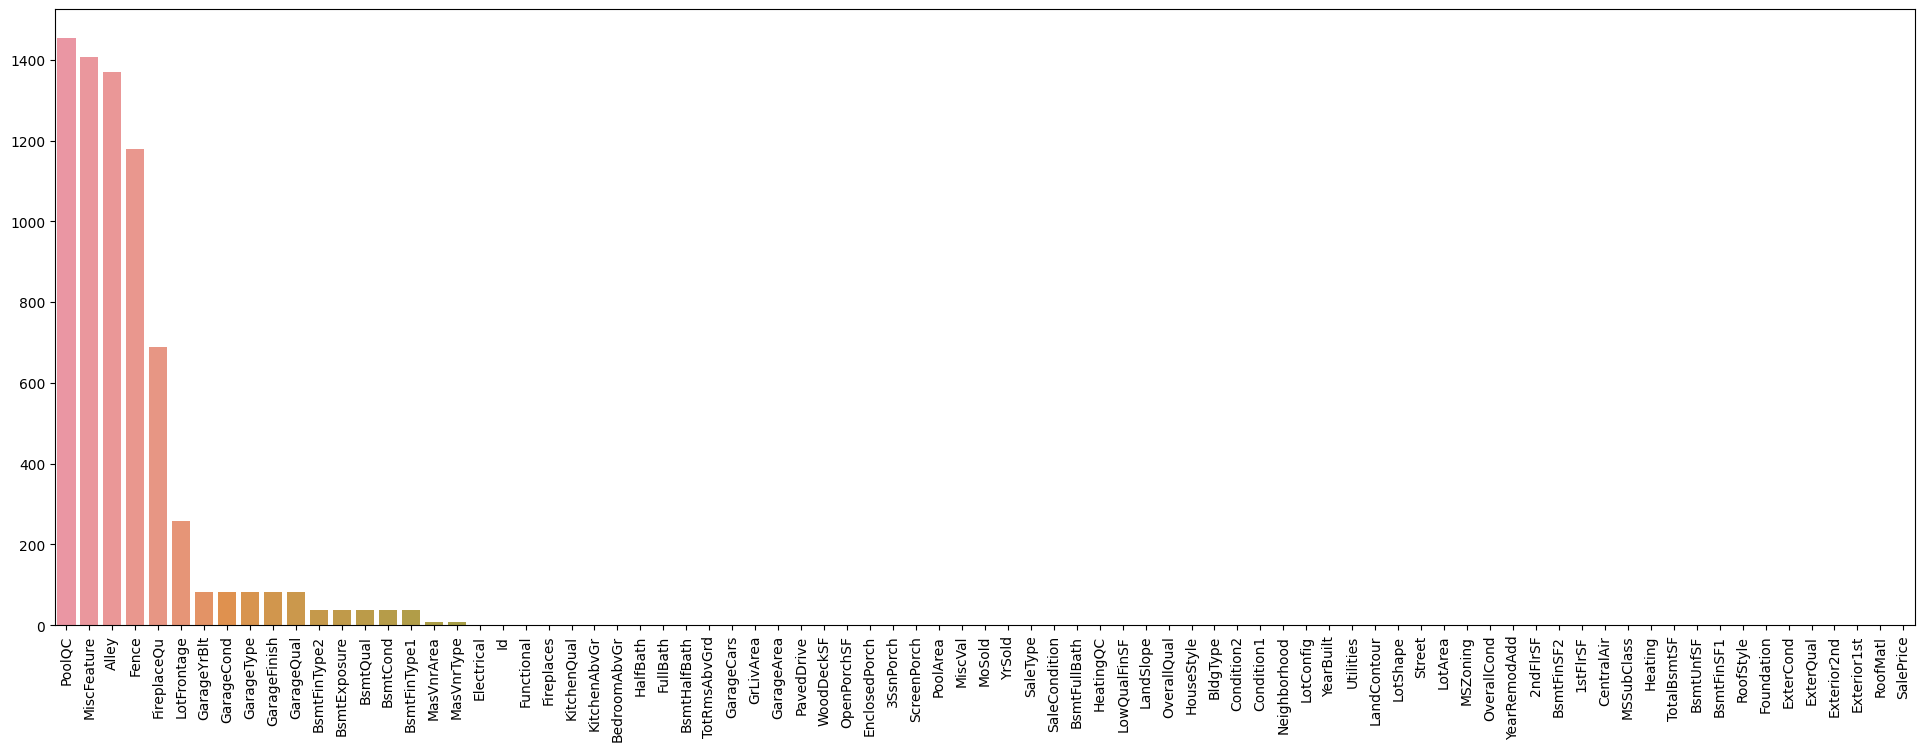

In [ ]:
#因為資料太多且雜 做一個表格列出空格多的特真
import matplotlib.pyplot as plt
import seaborn as sns
#創建一個寬度為 24 單位、高度為 8 單位的新圖形
plt.figure(figsize=(24,8))
#train_df.isnull(): 創train_df的副本(cols_with_null)，相應train_df 把有資料設True或沒資料設False。
#.sum(): 將每個欄位上的 True 值相加, 看哪個特徵缺最多資料。
#.sort_values(ascending=False): 降冪排列
cols_with_null=train_df.isnull().sum().sort_values(ascending=False)
# 設置表格x y 軸
sns.barplot(x=cols_with_null.index,y=cols_with_null)
# 旋轉表格角度
plt.xticks(rotation=90)
plt.show;

In [ ]:
cols_with_null.head(10)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [ ]:
#刪除不要的資料
train_df = train_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','LotFrontage'], axis=1)
train_df = train_df.drop(['PoolArea','3SsnPorch','LowQualFinSF','MoSold','YrSold'], axis=1)
train_df = train_df.select_dtypes(include = ['float64', 'int64'])
train_df = train_df.fillna(train_df.mean())
test_df = test_df.drop(['Id','PoolQC','MiscFeature','Alley','Fence','LotFrontage'], axis=1)
test_df = test_df.drop(['PoolArea','3SsnPorch','LowQualFinSF','MoSold','YrSold'], axis=1)
test_df = test_df.select_dtypes(include = ['float64', 'int64'])
#填補空缺資料
test_df = test_df.fillna(test_df.mean())


#把價格是空的格子填入平均值
train_df['SalePrice'].isnull().sum()

list(set(train_df.dtypes.tolist()))
list(set(test_df.dtypes.tolist()))

#訓練的(題目:x 答案:y)
x_train=train_df.drop(['SalePrice'],axis=1)
y_train=train_df['SalePrice']

In [ ]:
#list(set(train_df.dtypes.tolist()))例子
import pandas as pd

data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'Score': [92.5, 88.2, 95.0],
    'IsStudent': [True, False, True]
}

dataset_df = pd.DataFrame(data)

unique_data_types = list(set(dataset_df.dtypes.tolist()))

print("Different data types in the DataFrame:")
print(unique_data_types)


Different data types in the DataFrame:
[dtype('int64'), dtype('float64'), dtype('O'), dtype('bool')]


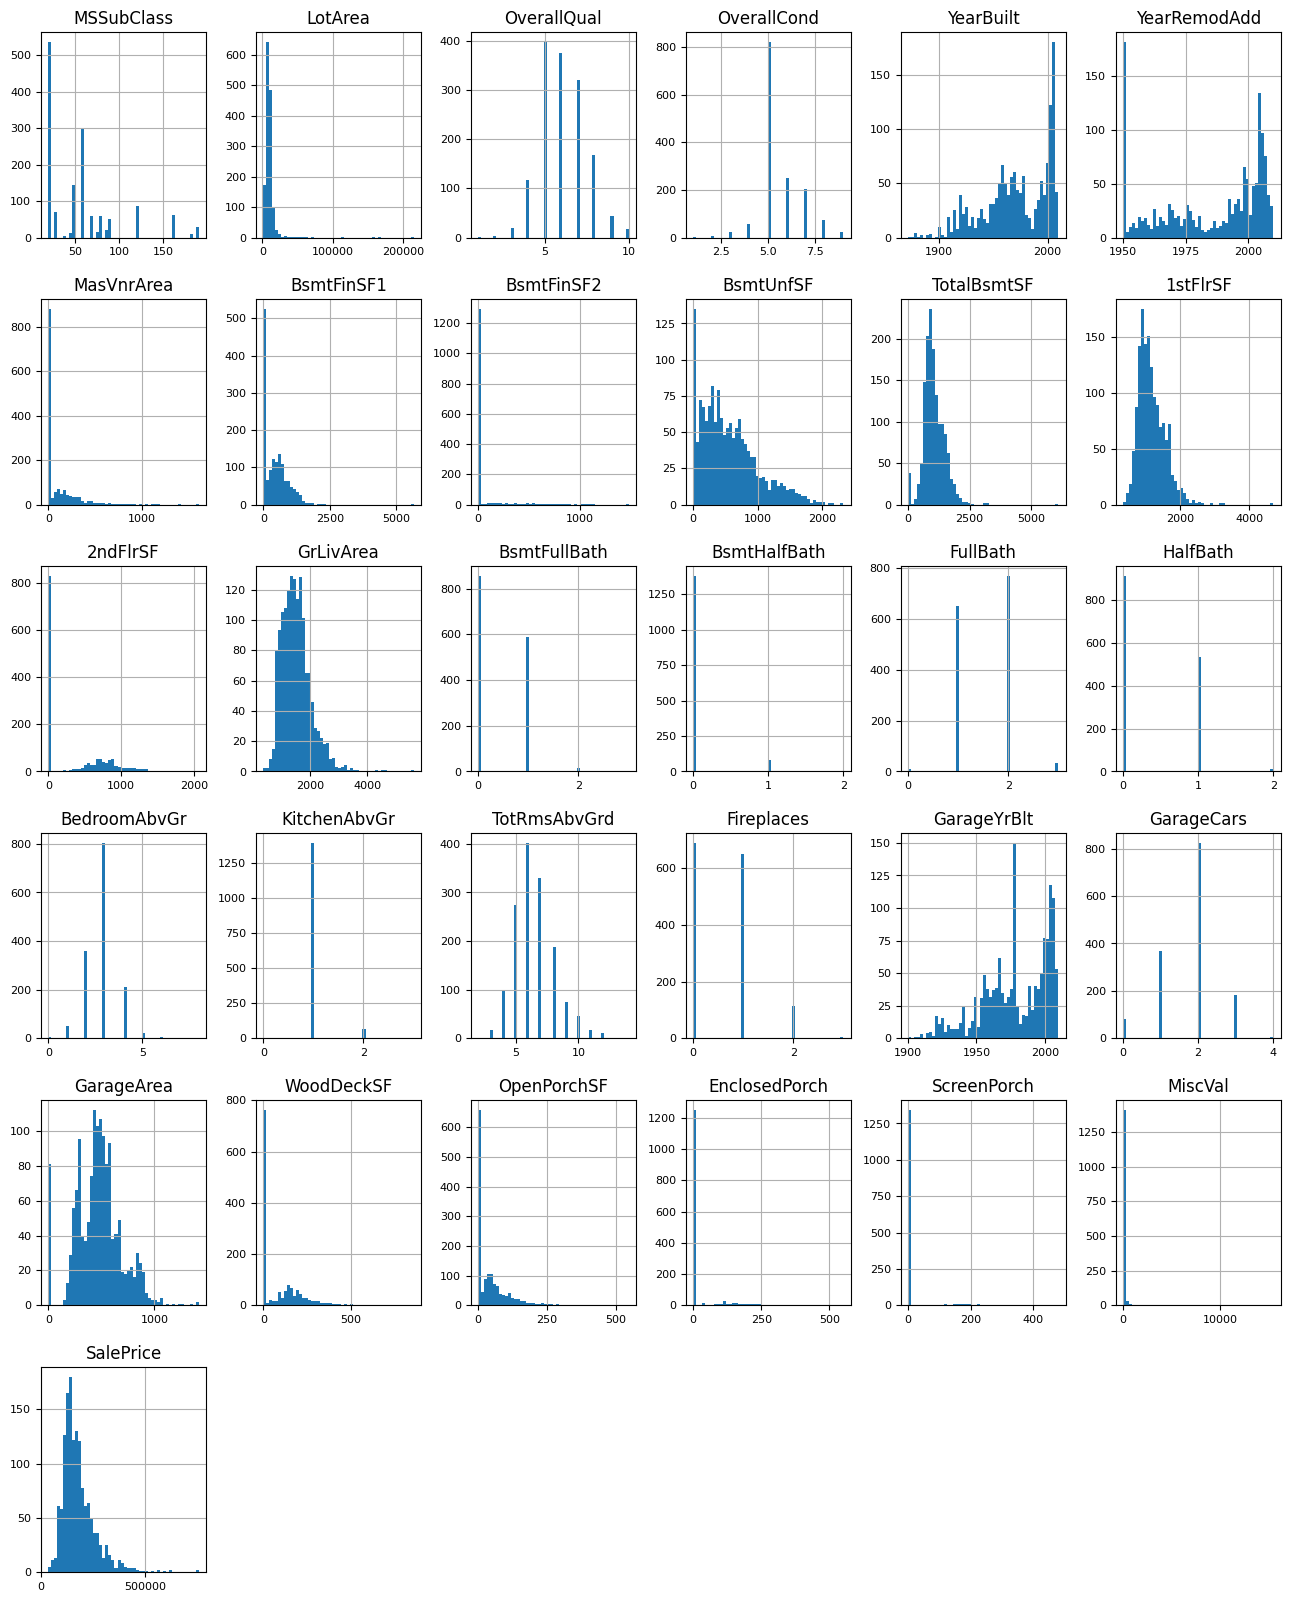

In [ ]:
train_df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [ ]:
mean=x_train.mean(axis=0)
x_train-=mean
std=x_train.std(axis=0)
x_train/=std
test_df-=mean
test_df/=std

In [ ]:
from sklearn.model_selection import train_test_split
xx_train, x_val, yy_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt

X = xx_train
y = yy_train
discrete_features='auto'

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]

OverallQual      0.519679
GarageCars       0.351856
1stFlrSF         0.298522
FullBath         0.264583
TotRmsAbvGrd     0.173974
OpenPorchSF      0.159825
OverallCond      0.094409
HalfBath         0.065927
KitchenAbvGr     0.017072
EnclosedPorch    0.002732
Name: MI Scores, dtype: float64

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# # 將 NumPy 數組轉換為 Pandas Series
# mi_scores_series = pd.Series(mi_scores, name="MI Scores")

# # 繪製長條圖
# mi_scores_series.plot(kind='bar', figsize=(10, 6))
# plt.title('feature_scores')
# plt.xlabel('feature')
# plt.ylabel('mi_scores')
# plt.show()


In [ ]:
#mi_scores.tail(10)

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 27.9 MB/s eta 0:00:00


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(64,activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(32,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(32,activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(16,activation="relu"),
    layers.Dense(8,activation="relu"),
    layers.Dense(4,activation="linear"),
    layers.Dense(2,activation="linear"),
    layers.Dense(1,activation="linear")
])


In [ ]:
#總結
model.compile(optimizer='rmsprop',#優化器
      loss='mae',#損失函數
      metrics=['accuracy']#評量指標
              )


In [ ]:
history=model.fit(
    xx_train,
    yy_train,
    epochs=500,
    batch_size=32,
    validation_data=(x_val,y_val)

)

Epoch 1/500
37/37 [==============================] - 3s 15ms/step - loss: 181440.6562 - accuracy: 0.0000e+00 - val_loss: 178839.1406 - val_accuracy: 0.0000e+00
Epoch 2/500
37/37 [==============================] - 0s 7ms/step - loss: 181437.7812 - accuracy: 0.0000e+00 - val_loss: 178835.7344 - val_accuracy: 0.0000e+00
Epoch 3/500
37/37 [==============================] - 0s 6ms/step - loss: 181430.7344 - accuracy: 0.0000e+00 - val_loss: 178823.3906 - val_accuracy: 0.0000e+00
Epoch 4/500
37/37 [==============================] - 0s 7ms/step - loss: 181415.4219 - accuracy: 0.0000e+00 - val_loss: 178792.0156 - val_accuracy: 0.0000e+00
Epoch 5/500
37/37 [==============================] - 0s 7ms/step - loss: 181384.2656 - accuracy: 0.0000e+00 - val_loss: 178746.3281 - val_accuracy: 0.0000e+00
Epoch 6/500
37/37 [==============================] - 0s 6ms/step - loss: 181329.8594 - accuracy: 0.0000e+00 - val_loss: 178672.9844 - val_accuracy: 0.0000e+00
Epoch 7/500
37/37 [==========================

In [ ]:
import numpy as np
test_df = test_df.astype(np.float64)
final_preds=model.predict(test_df)#預測
print(final_preds)


46/46 [==============================] - 0s 2ms/step
[[121225.36]
 [161984.19]
 [188053.56]
 ...
 [178729.6 ]
 [134047.69]
 [230051.28]]


In [ ]:
import pandas as pd
import csv

# 假設 'samplecsv.csv' 有一個 'id' 列
sample_csv=pd.read_csv('/content/drive/MyDrive/AI/train_test_csv/house-prices-advanced-regression-techniques/sample_submission.csv')

# 將 'final_preds' 截斷到 'id' 列的長度
final_preds_truncated = final_preds[:len(sample_csv['Id'])]

# 創建 DataFrame
samplecsv = pd.DataFrame({'Id': sample_csv['Id'], 'SalePrice': final_preds_truncated.flatten()})

# 將 DataFrame 保存到新的 CSV 文件
samplecsv.to_csv('samplecsv6.csv', index=False)